# Seoul Bike Sharing Demand
#### Sena Oz 2019502156

The dataset contains information about the bike sharing system in Seoul, South Korea. The data was collected between 2017 and 2018. The dataset contains 8760 rows and 14 columns.

**Data Source**: [UCI Machine Learning Repository, Seoul Bike Sharing Demand Dataset](https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand)


In [205]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Loading the dataset
file_path = './seoulBikeData.csv'
df = pd.read_csv(file_path, encoding='unicode_escape')

# Preprocessing date information
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Date'] = pd.to_datetime(df['Date'])
df['Day_of_Week'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day_of_Week,Month,Year
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,12,2017
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,12,2017
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,4,12,2017
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,12,2017
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,12,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,4,11,2018
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,4,11,2018
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,4,11,2018
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,4,11,2018


In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [207]:
df.describe()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Day_of_Week,Month,Year
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,2018-05-31 23:59:59.999999744,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,3.002740,6.526027,2017.915068
min,2017-12-01 00:00:00,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,0.000000,1.000000,2017.000000
25%,2018-03-02 00:00:00,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,1.000000,4.000000,2018.000000
50%,2018-06-01 00:00:00,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,3.000000,7.000000,2018.000000
75%,2018-08-31 00:00:00,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,5.000000,10.000000,2018.000000
max,2018-11-30 00:00:00,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,6.000000,12.000000,2018.000000
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,1.998056,3.448048,0.278796


## Data Visualization


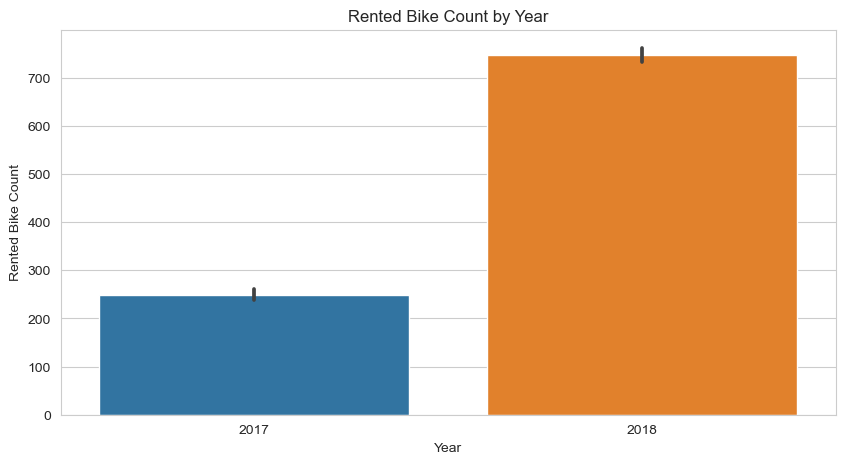

In [208]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(x='Year', y='Rented Bike Count', data=df)
plt.title('Rented Bike Count by Year')
plt.show()

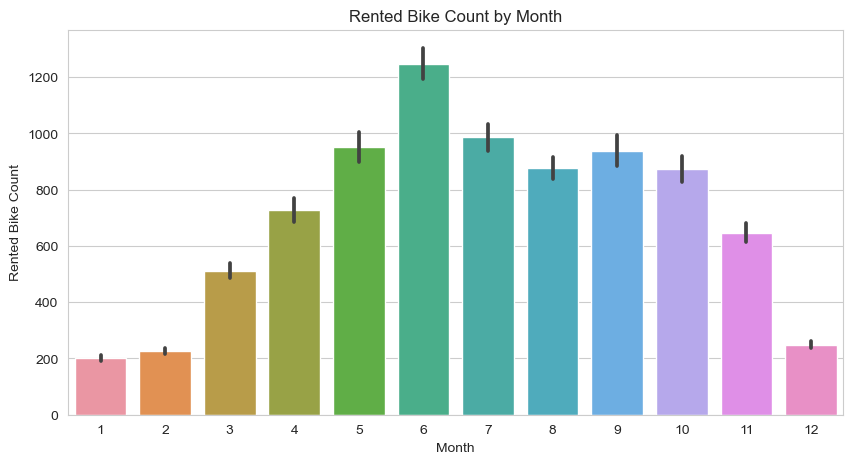

In [209]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Month', y='Rented Bike Count', data=df)
plt.title('Rented Bike Count by Month')
plt.show()

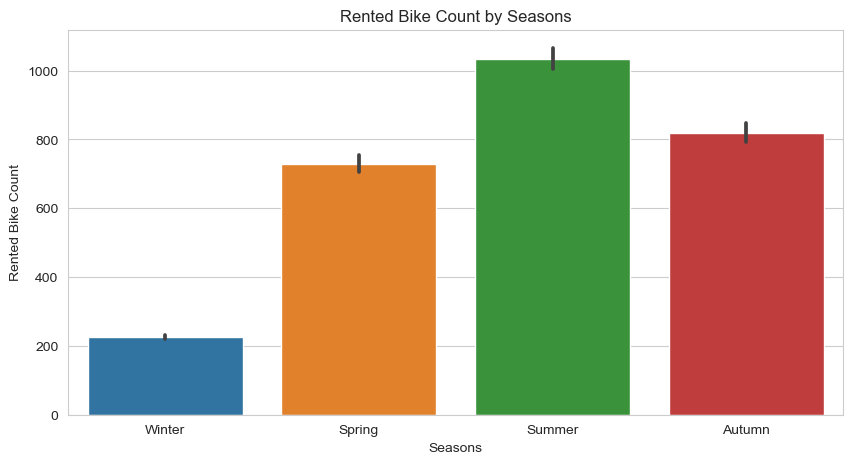

In [210]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Seasons', y='Rented Bike Count', data=df)
plt.title('Rented Bike Count by Seasons')
plt.show()

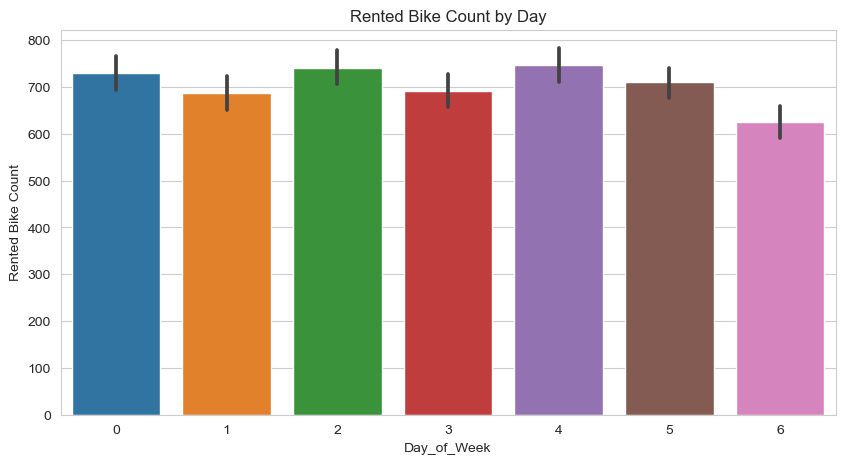

In [211]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Day_of_Week', y='Rented Bike Count', data=df)
plt.title('Rented Bike Count by Day')
plt.show()

Text(0.5, 1.0, 'Rented Bike Count by Hour')

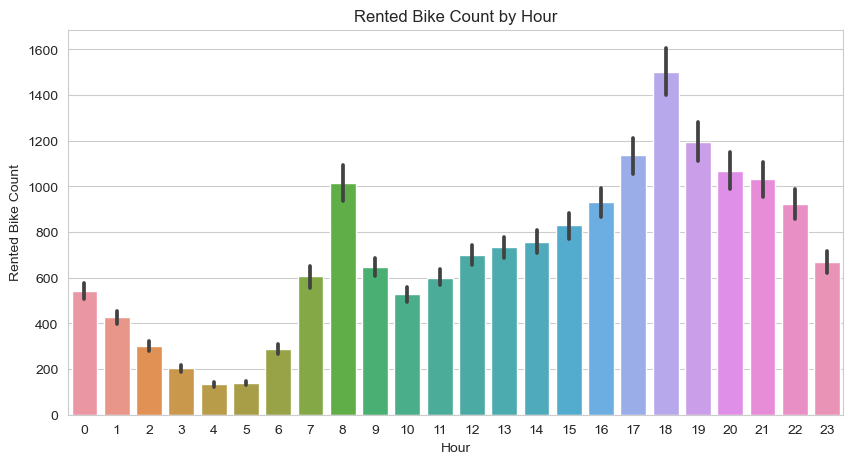

In [212]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Hour', y='Rented Bike Count', data=df)
plt.title('Rented Bike Count by Hour')

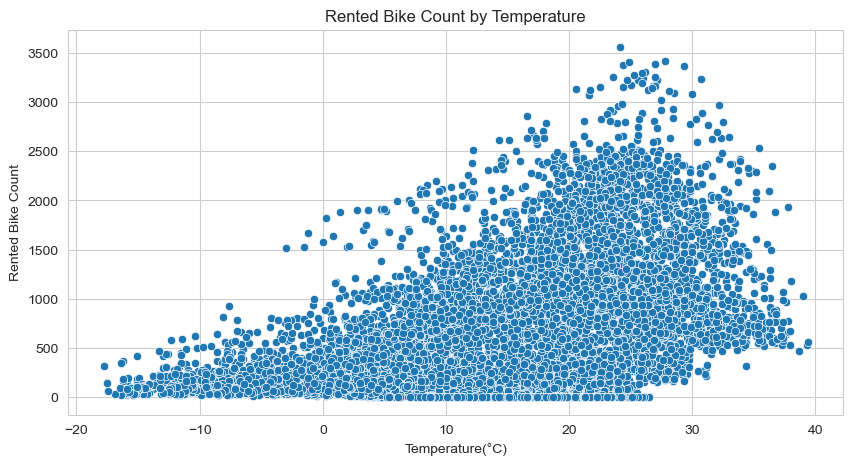

In [213]:
# Scatterplot
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Temperature(°C)', y='Rented Bike Count', data=df)
plt.title('Rented Bike Count by Temperature')
plt.show()

Text(0.5, 1.0, 'Rented Bike Count by Humidity')

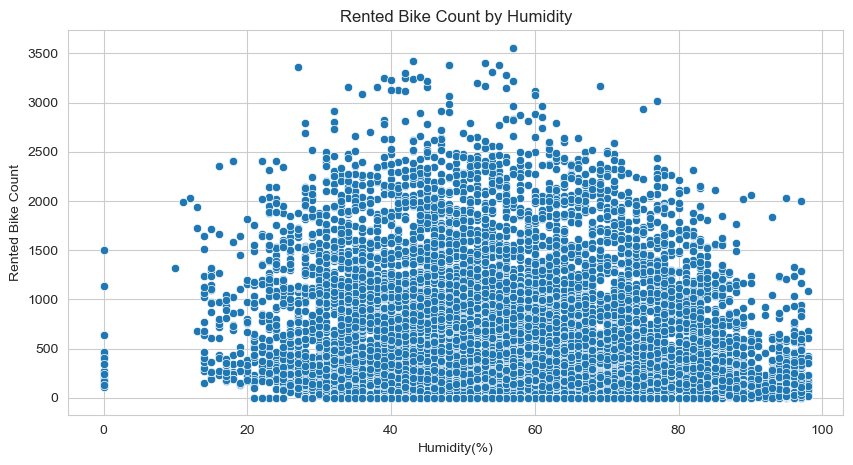

In [214]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Humidity(%)', y='Rented Bike Count', data=df)
plt.title('Rented Bike Count by Humidity')


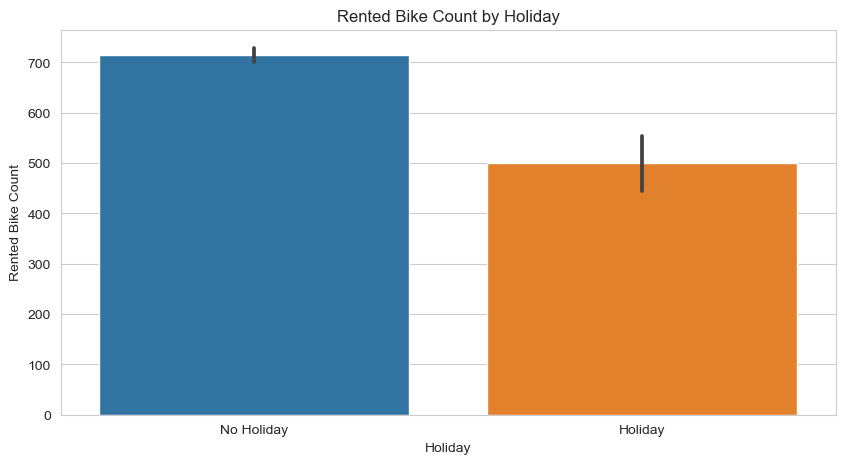

In [215]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Holiday', y='Rented Bike Count', data=df)
plt.title('Rented Bike Count by Holiday')
plt.show()

# Encoding data

In [216]:
# Encoding categorical data
bike_data_encoded = pd.get_dummies(df, columns=['Seasons'])
bike_data_encoded['Functioning Day'] = bike_data_encoded['Functioning Day'].map({'Yes': 1, 'No': 0})
bike_data_encoded['Holiday'] = bike_data_encoded['Holiday'].map({'Holiday': 1, 'No Holiday': 0})

# Handling outliers
bike_data_encoded = bike_data_encoded[bike_data_encoded['Rented Bike Count'] < bike_data_encoded['Rented Bike Count'].quantile(0.99)]

# Splitting the dataset
X = bike_data_encoded.drop(['Rented Bike Count', 'Date'], axis=1)
y = bike_data_encoded['Rented Bike Count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

bike_data_encoded

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Day_of_Week,Month,Year,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,4,12,2017,False,False,False,True
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,4,12,2017,False,False,False,True
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,4,12,2017,False,False,False,True
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,4,12,2017,False,False,False,True
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,4,12,2017,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,1,4,11,2018,True,False,False,False
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,1,4,11,2018,True,False,False,False
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,1,4,11,2018,True,False,False,False
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,1,4,11,2018,True,False,False,False


In [217]:
# Correlation matrix
bike_data_encoded.corr()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Day_of_Week,Month,Year,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
Date,1.000000,0.350718,-0.003470,0.579030,0.172127,-0.163184,0.105888,0.563357,0.091854,0.038545,-0.136634,-0.065359,-0.184826,-0.005294,0.528437,0.482857,0.750506,-0.254914,0.252024,-0.747062
Rented Bike Count,0.350718,1.000000,0.403414,0.539554,-0.197375,0.107817,0.196637,0.380272,0.274297,-0.126339,-0.144800,-0.068718,0.210486,-0.014550,0.140220,0.218164,0.112562,0.027091,0.292648,-0.432459
Hour,-0.003470,0.403414,1.000000,0.115366,-0.239193,0.281951,0.095229,-0.003847,0.144979,0.010055,-0.019918,0.002261,0.003613,0.004484,-0.000538,-0.003026,0.000945,0.000637,-0.007275,0.005688
Temperature(°C),0.579030,0.539554,0.115366,1.000000,0.164782,-0.042498,0.030501,0.912894,0.354068,0.051930,-0.217964,-0.053928,-0.052403,0.001208,0.217280,0.377078,0.062676,0.009914,0.665861,-0.738440
Humidity(%),0.172127,-0.197375,-0.239193,0.164782,1.000000,-0.335976,-0.543293,0.541414,-0.462421,0.236384,0.107700,-0.051398,-0.020039,-0.009357,0.140369,0.037351,0.028704,0.017443,0.195520,-0.241735
Wind speed (m/s),-0.163184,0.107817,0.281951,-0.042498,-0.335976,1.000000,0.170461,-0.181546,0.332146,-0.018966,-0.002540,0.024491,0.003942,-0.018992,-0.155913,-0.005626,-0.125715,0.081919,-0.069760,0.113290
Visibility (10m),0.105888,0.196637,0.095229,0.030501,-0.543293,0.170461,1.000000,-0.180451,0.149764,-0.167643,-0.121369,0.032894,-0.026917,-0.024952,0.064154,0.051240,0.117692,-0.188346,0.060193,0.011188
Dew point temperature(°C),0.563357,0.380272,-0.003847,0.912894,0.541414,-0.181546,-0.180451,1.000000,0.093642,0.126960,-0.150221,-0.065402,-0.054347,-0.010487,0.243204,0.335527,0.065330,0.004684,0.652058,-0.722041
Solar Radiation (MJ/m2),0.091854,0.274297,0.144979,0.354068,-0.462421,0.332146,0.149764,0.093642,1.000000,-0.074225,-0.072190,-0.004819,-0.007892,0.010665,-0.030779,0.127931,-0.029534,0.079542,0.127937,-0.178244
Rainfall(mm),0.038545,-0.126339,0.010055,0.051930,0.236384,-0.018966,-0.167643,0.126960,-0.074225,1.000000,0.008273,-0.014577,0.002303,-0.018434,0.012055,0.027942,-0.013407,0.017609,0.055359,-0.059618


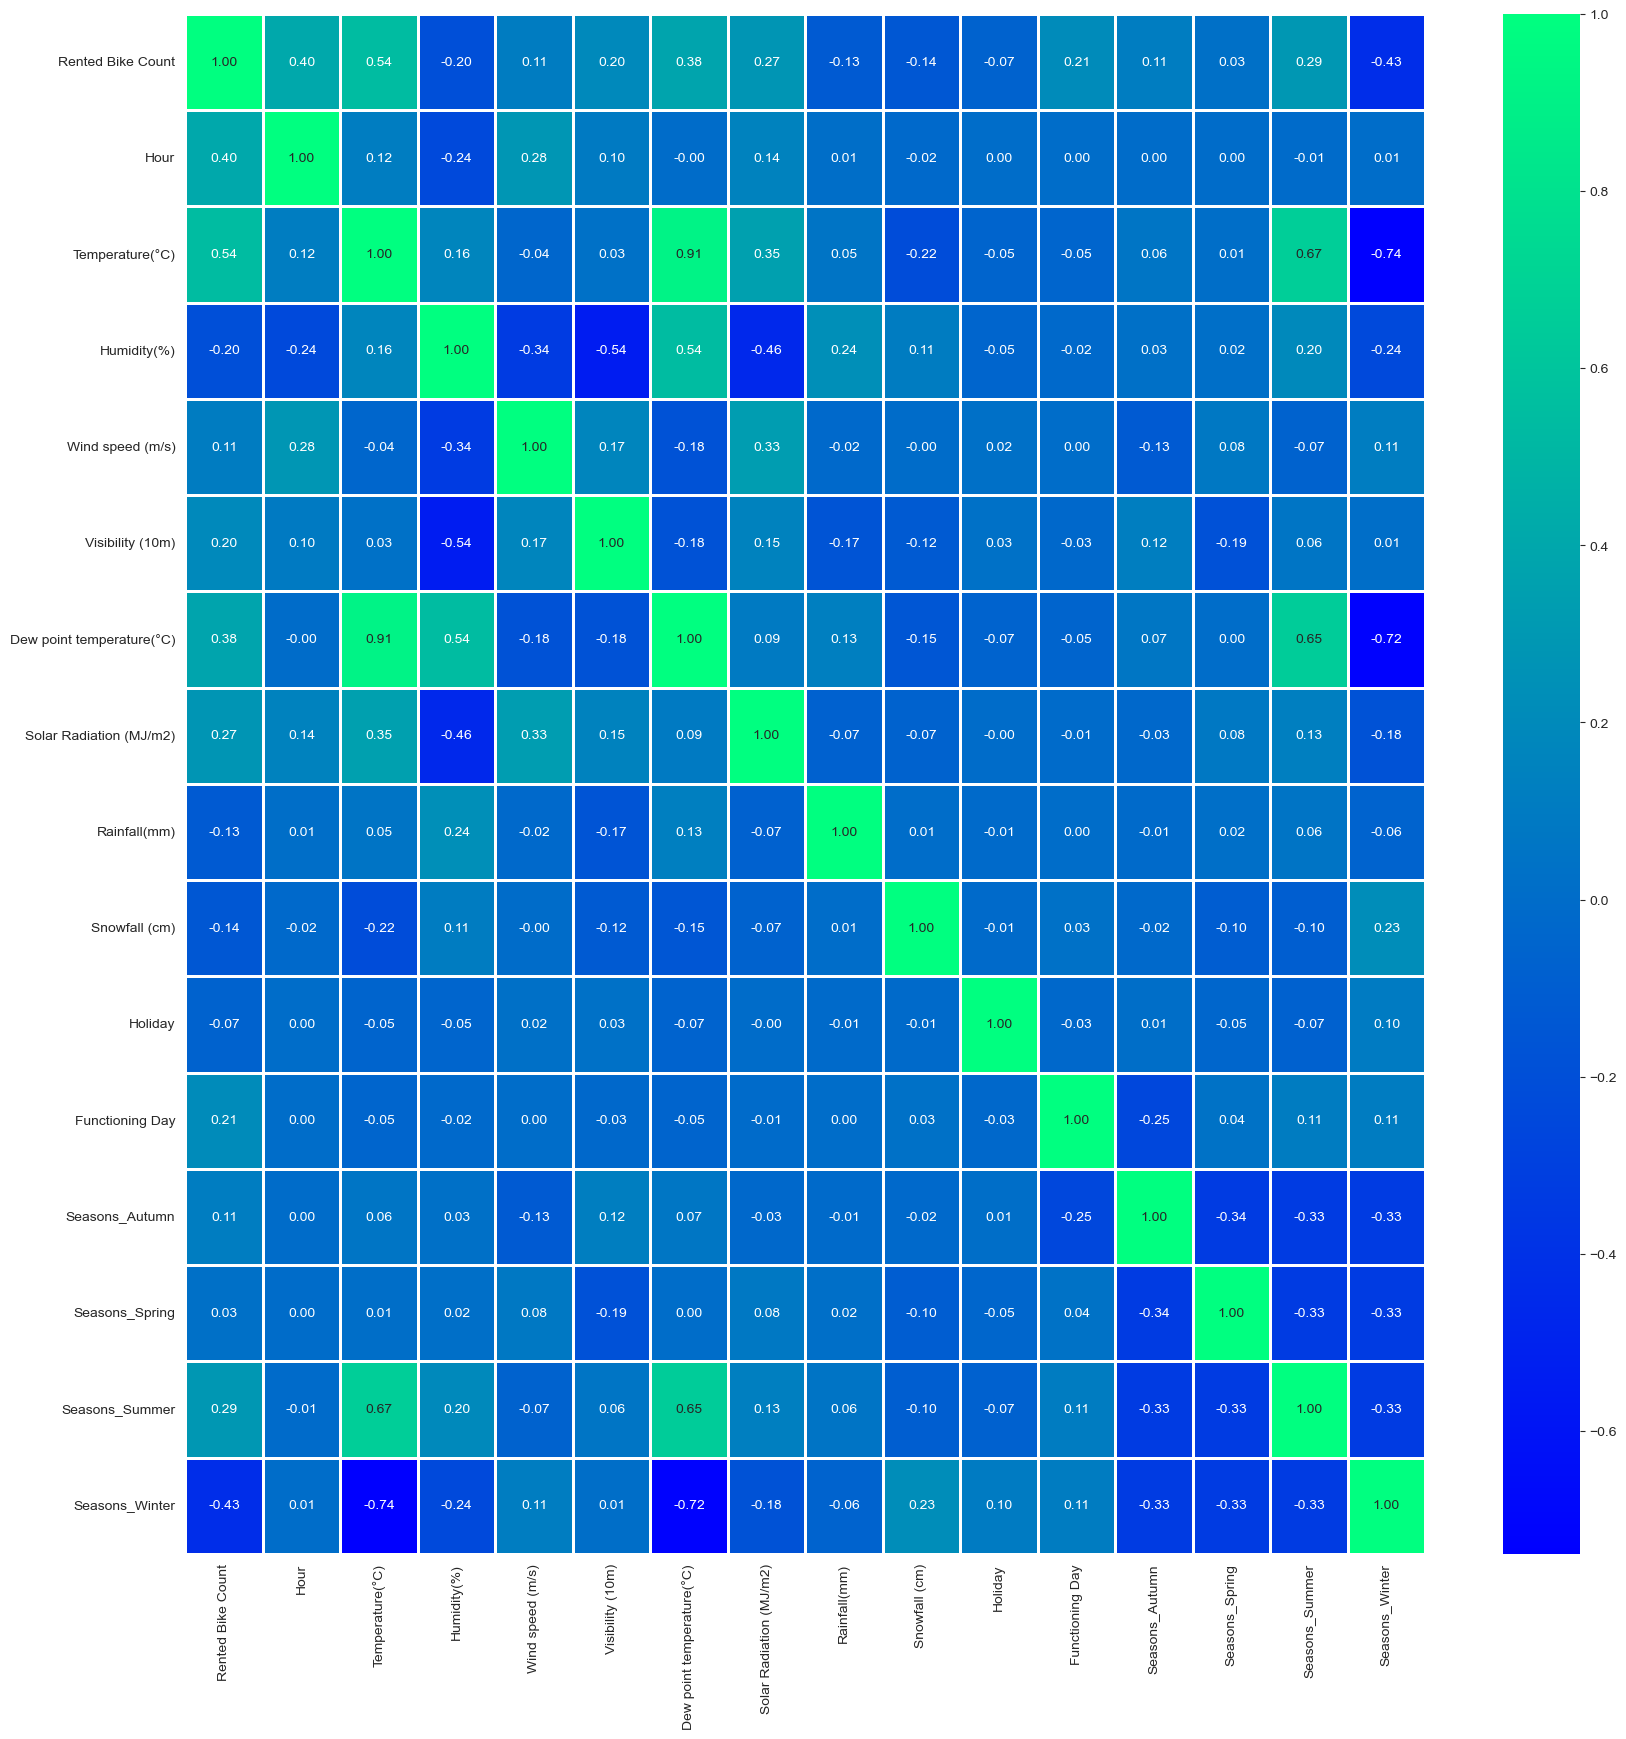

In [218]:
# Explain the correlation between the variables
# Drop the columns that are not needed
bike_data = bike_data_encoded.drop(['Year', 'Month', 'Day_of_Week', 'Date'], axis=1)

plt.figure(figsize=(20, 20))
sns.heatmap(bike_data.corr(), annot=True, fmt='.2f', linewidths=2, cmap='winter')
plt.show()

In [219]:
# Training linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Training random forest regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Training gradient boosting regression model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Making predictions
# Rented Bike Count cannot be negative, so we will clip the predictions to 0
lr_predictions = lr_model.predict(X_test_scaled).clip(min=0)
rf_predictions = rf_model.predict(X_test_scaled).clip(min=0)
gb_predictions = gb_model.predict(X_test_scaled).clip(min=0)

In [220]:
# Evaluating models
lr_mse = mean_squared_error(y_test, lr_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
gb_mse = mean_squared_error(y_test, gb_predictions)

print(f"Linear Regression MSE: {lr_mse}")
print(f"Random Forest MSE: {rf_mse}")
print(f"Gradient Boosting MSE: {gb_mse}")

print(f"Linear Regression RMSE: {lr_mse ** 0.5}")
print(f"Random Forest RMSE: {rf_mse ** 0.5}")
print(f"Gradient Boosting RMSE: {gb_mse ** 0.5}")

Linear Regression MSE: 154949.6725397558
Random Forest MSE: 21450.644464495675
Gradient Boosting MSE: 47497.12716614529
Linear Regression RMSE: 393.63647257305286
Random Forest RMSE: 146.4603853077537
Gradient Boosting RMSE: 217.93835634450696


In [221]:
# Creating a dataframe to compare predictions with actual values

df_predictions = pd.DataFrame({'Actual': y_test, 'Linear Regression': lr_predictions, 'Random Forest': rf_predictions, 'Gradient Boosting': gb_predictions})
df_predictions

,Actual,Linear Regression,Random Forest,Gradient Boosting
3957,1885,1147.756698,1830.77,1779.818443
4457,2190,1309.506698,2254.30,1924.225082
5925,1377,1268.506698,1484.71,1539.523925
8446,655,1074.256698,670.34,841.218282
811,431,492.167700,434.81,359.492924
...,...,...,...,...
4086,190,646.006698,303.70,421.852831
2611,818,1014.506698,731.90,963.881698
5732,1565,1320.756698,1654.67,1718.587171
1039,43,0.000000,94.17,200.405465


/var/folders/vm/b4p208t10117gt9zdll3kq_r0000gn/T/ipykernel_70621/2633084308.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, hist=False, color='b', label='Actual')
/var/folders/vm/b4p208t10117gt9zdll3kq_r0000gn/T/ipykernel_70621/2633084308.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637275

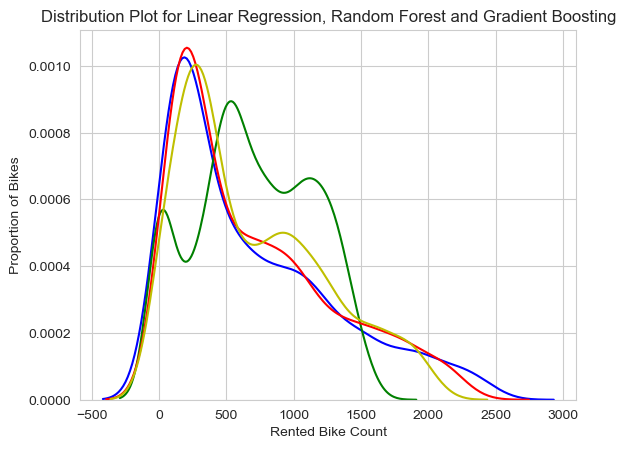

In [222]:
# Distribution plot

import seaborn as sns

sns.distplot(y_test, hist=False, color='b', label='Actual')
sns.distplot(lr_predictions, hist=False, color='g', label='Linear Regression')
sns.distplot(rf_predictions, hist=False, color='r', label='Random Forest')
sns.distplot(gb_predictions, hist=False, color='y', label='Gradient Boosting')

plt.title('Distribution Plot for Linear Regression, Random Forest and Gradient Boosting')
plt.xlabel('Rented Bike Count')
plt.ylabel('Proportion of Bikes')
plt.show()


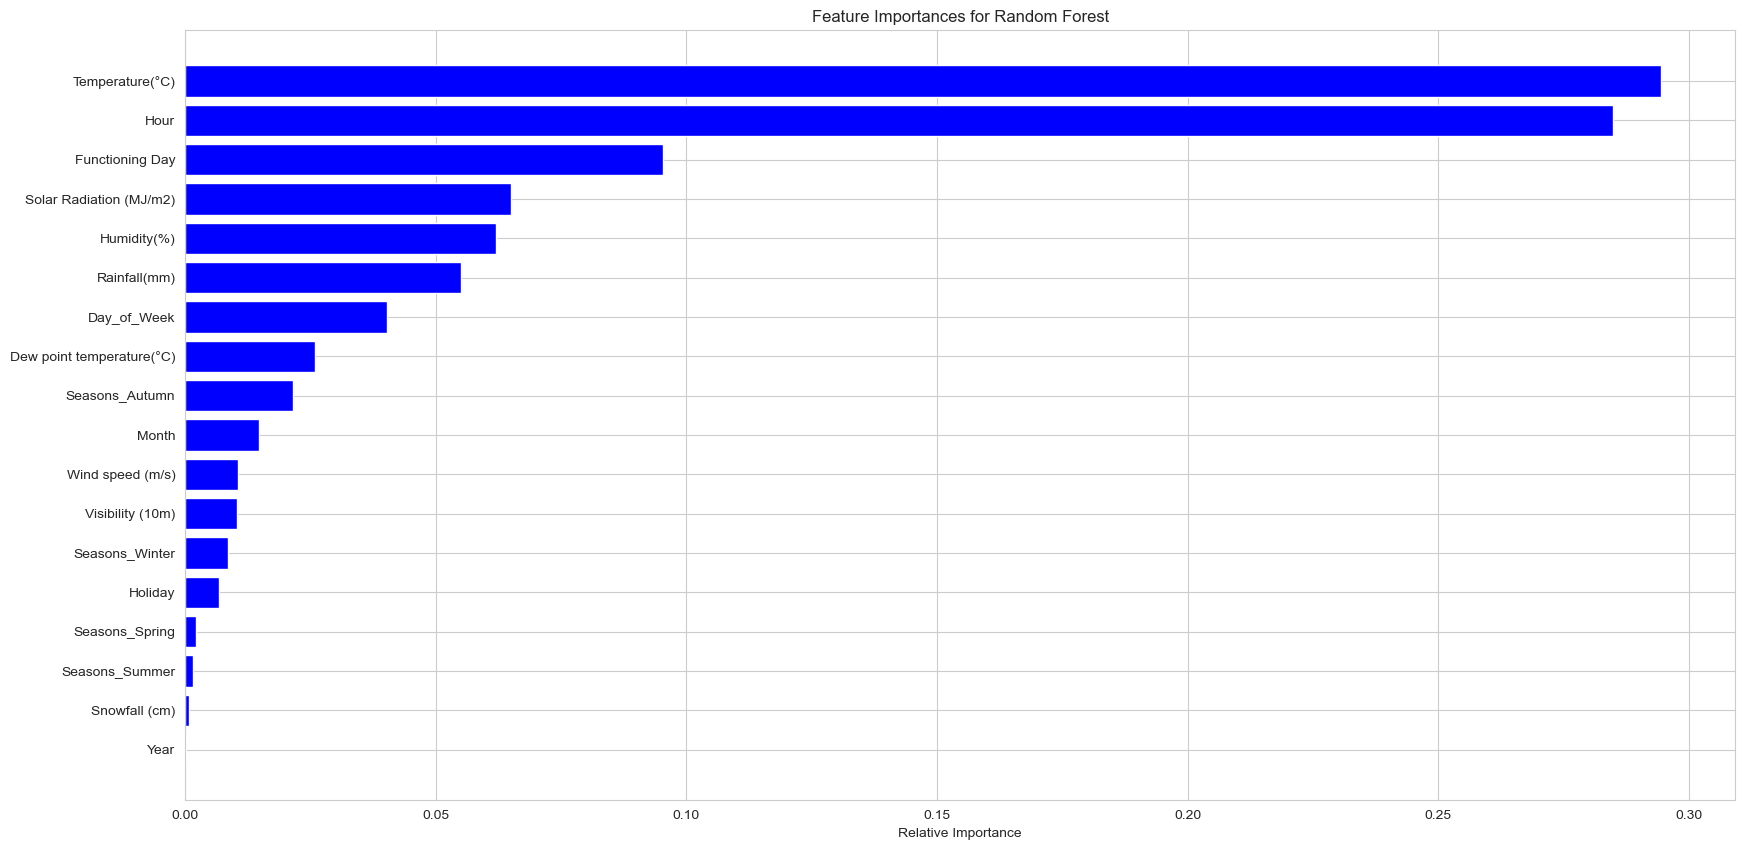

In [223]:
# Plotting the feature importances
# Feature importances for random forest model are calculated using the mean decrease in impurity method

import numpy as np

feature_importances = rf_model.feature_importances_
feature_names = X.columns
indices = np.argsort(feature_importances)

plt.figure(figsize=(20, 10))
plt.title('Feature Importances for Random Forest')
plt.barh(range(len(indices)), feature_importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

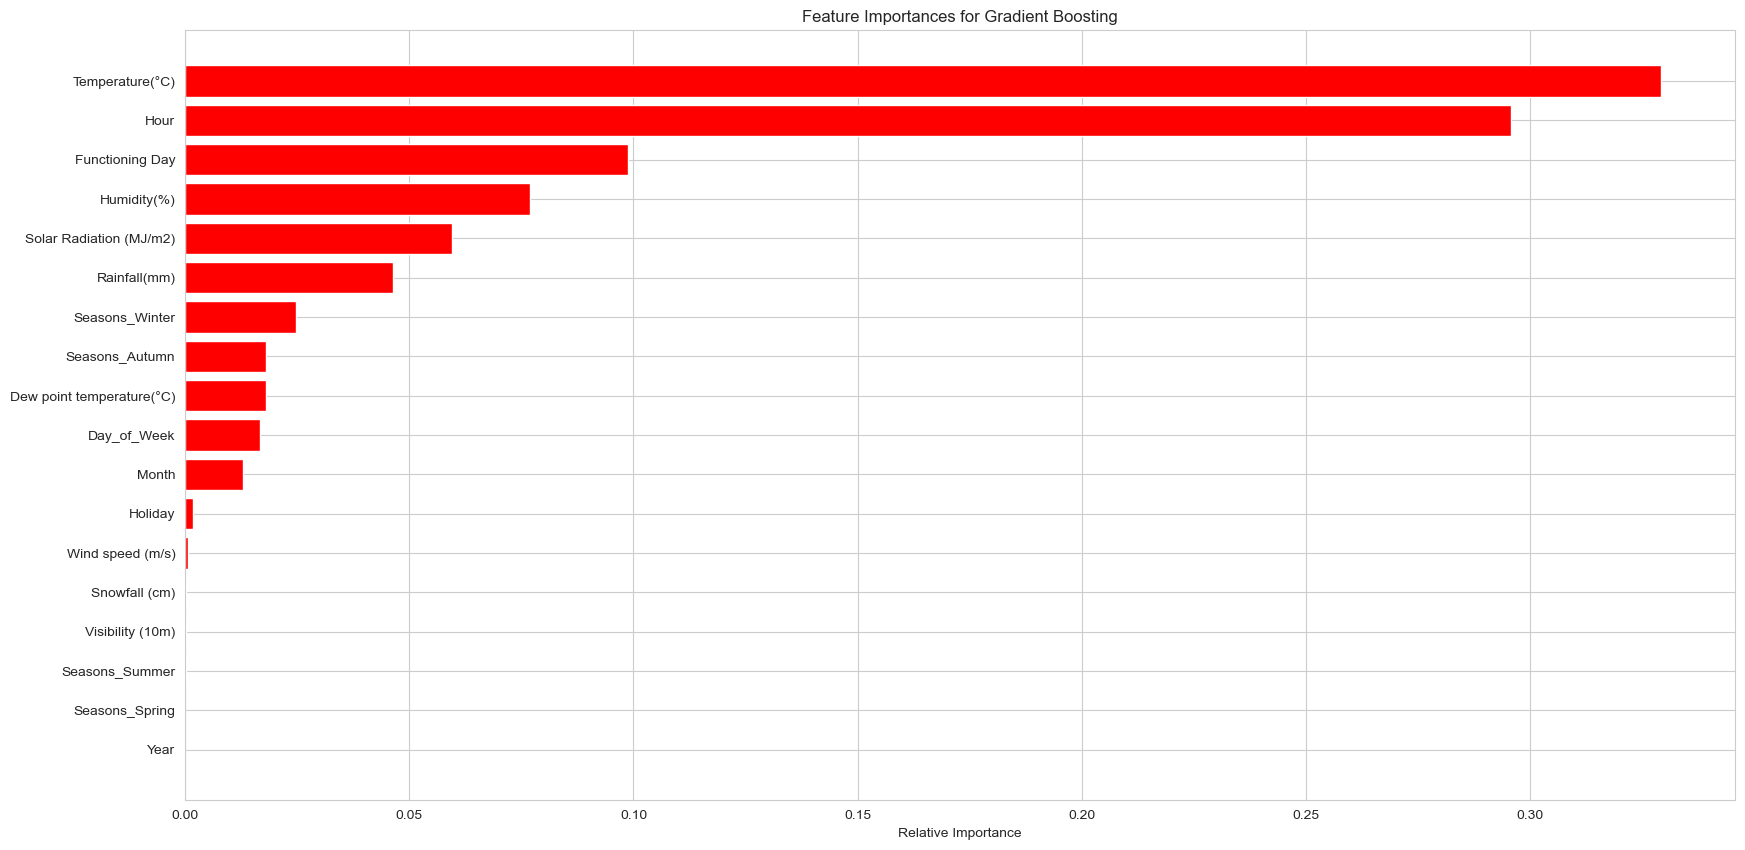

In [224]:
# Plotting the feature importances
# Feature importances for gradient boosting model are calculated using the mean decrease in impurity method

feature_importances = gb_model.feature_importances_
feature_names = X.columns
indices = np.argsort(feature_importances)

plt.figure(figsize=(20, 10))
plt.title('Feature Importances for Gradient Boosting')
plt.barh(range(len(indices)), feature_importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

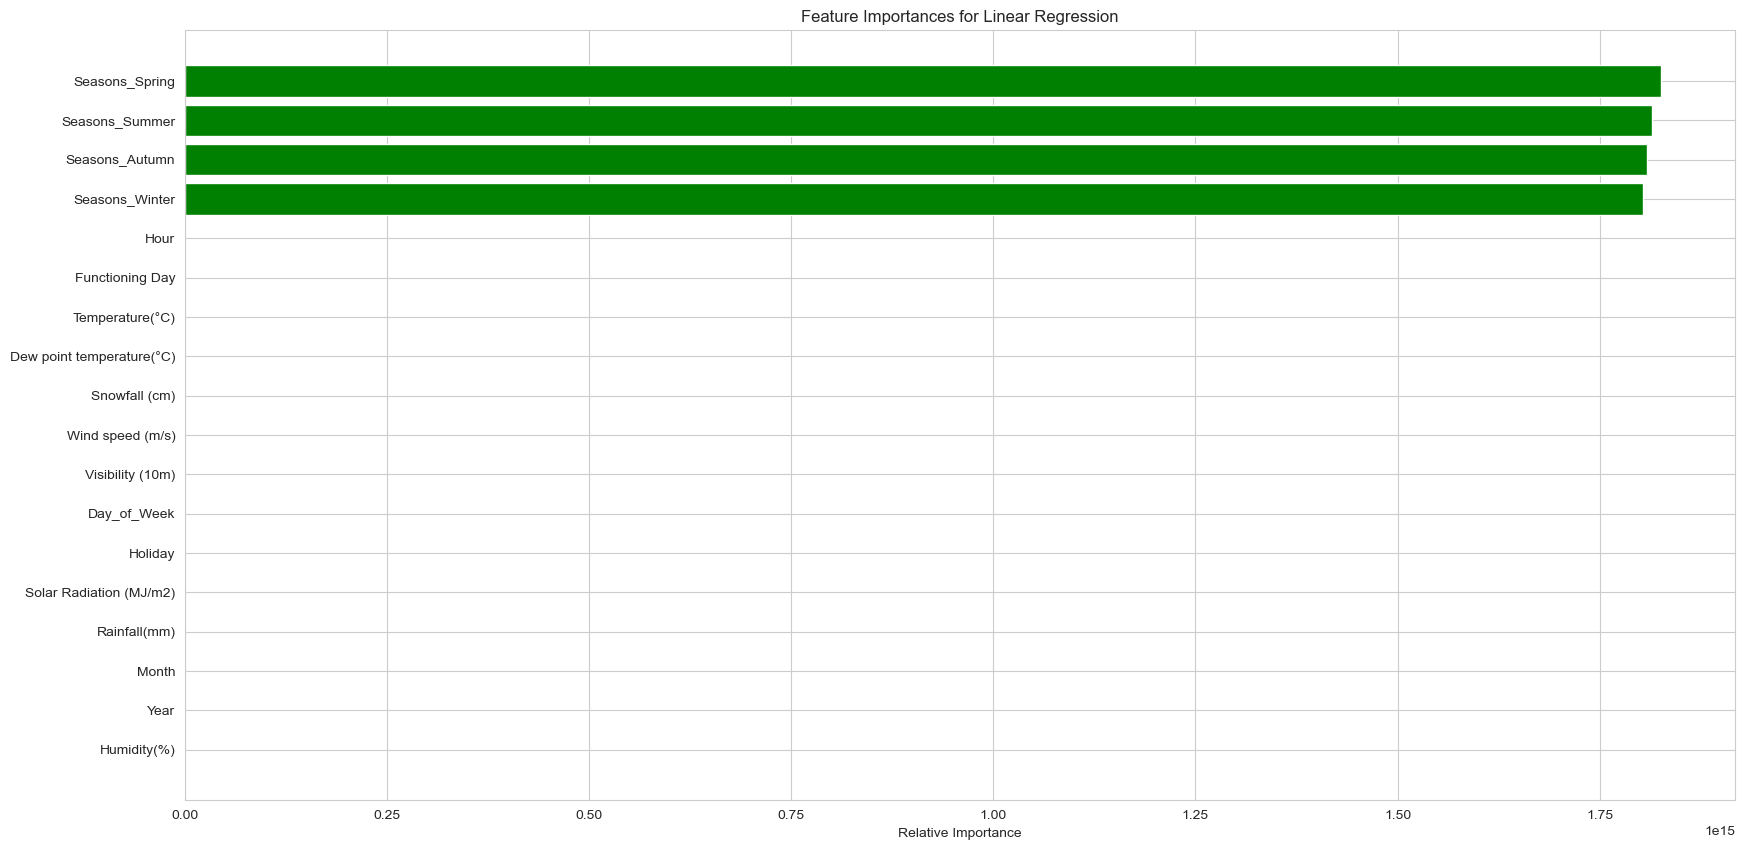

In [225]:
# Plotting the feature importances
# Feature importances for linear regression model are calculated using the coefficients

feature_importances = lr_model.coef_
feature_names = X.columns
indices = np.argsort(feature_importances)

plt.figure(figsize=(20, 10))
plt.title('Feature Importances for Linear Regression')
plt.barh(range(len(indices)), feature_importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

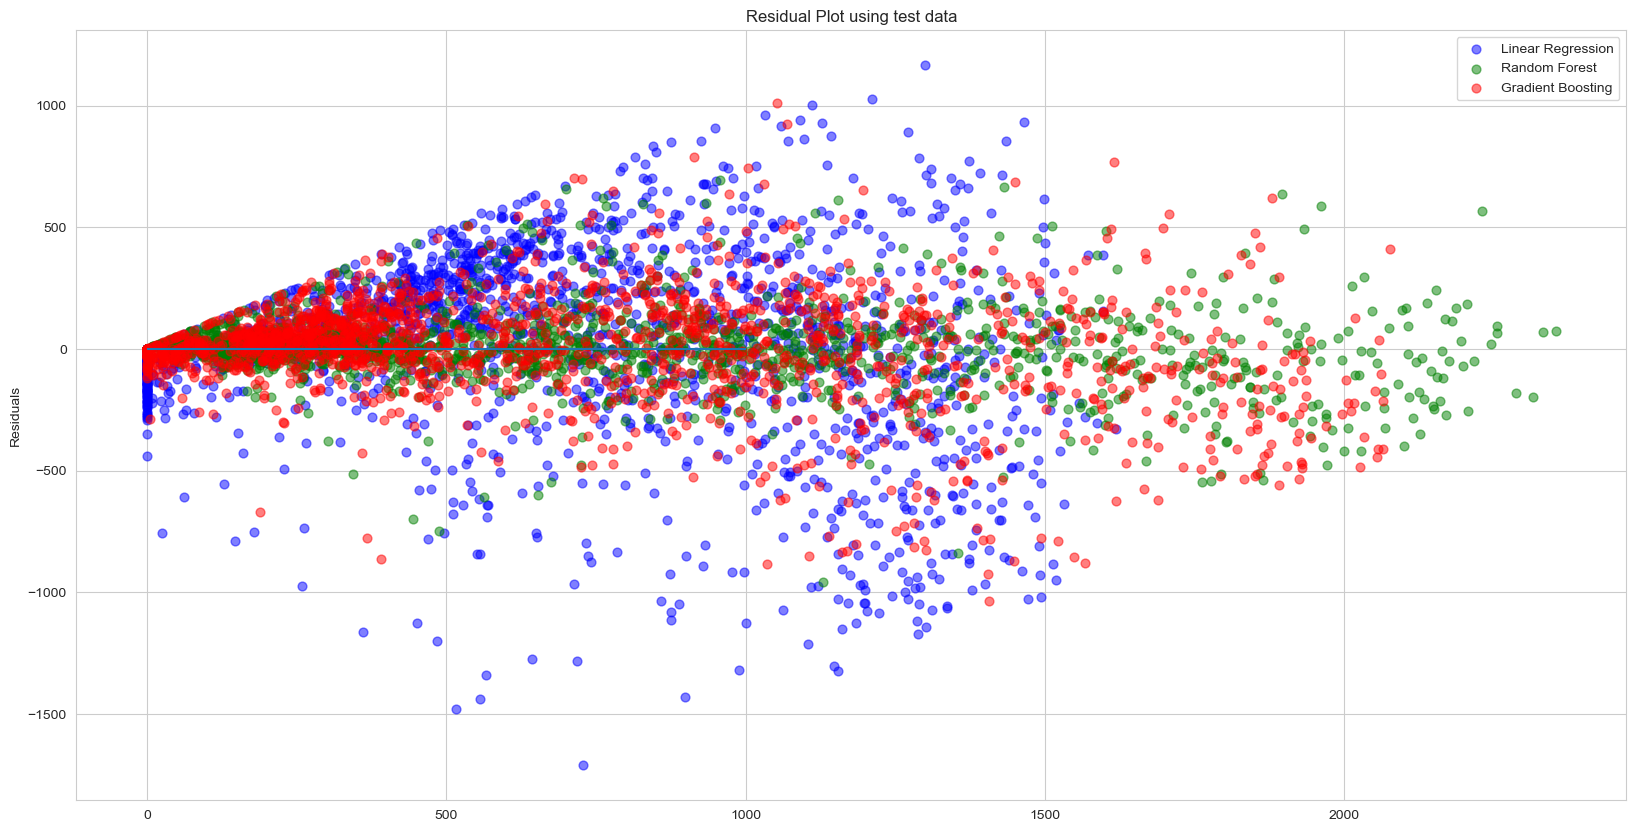

In [226]:
# Plotting the residuals
plt.figure(figsize=(20, 10))
plt.scatter(lr_predictions, lr_predictions - y_test, c='b', s=40, alpha=0.5)
plt.scatter(rf_predictions, rf_predictions - y_test, c='g', s=40, alpha=0.5)
plt.scatter(gb_predictions, gb_predictions - y_test, c='r', s=40, alpha=0.5)
plt.hlines(y=0, xmin=0, xmax=1000)

plt.ylabel('Residuals')
plt.legend(['Linear Regression', 'Random Forest', 'Gradient Boosting'])
plt.title('Residual Plot using test data')
plt.show()

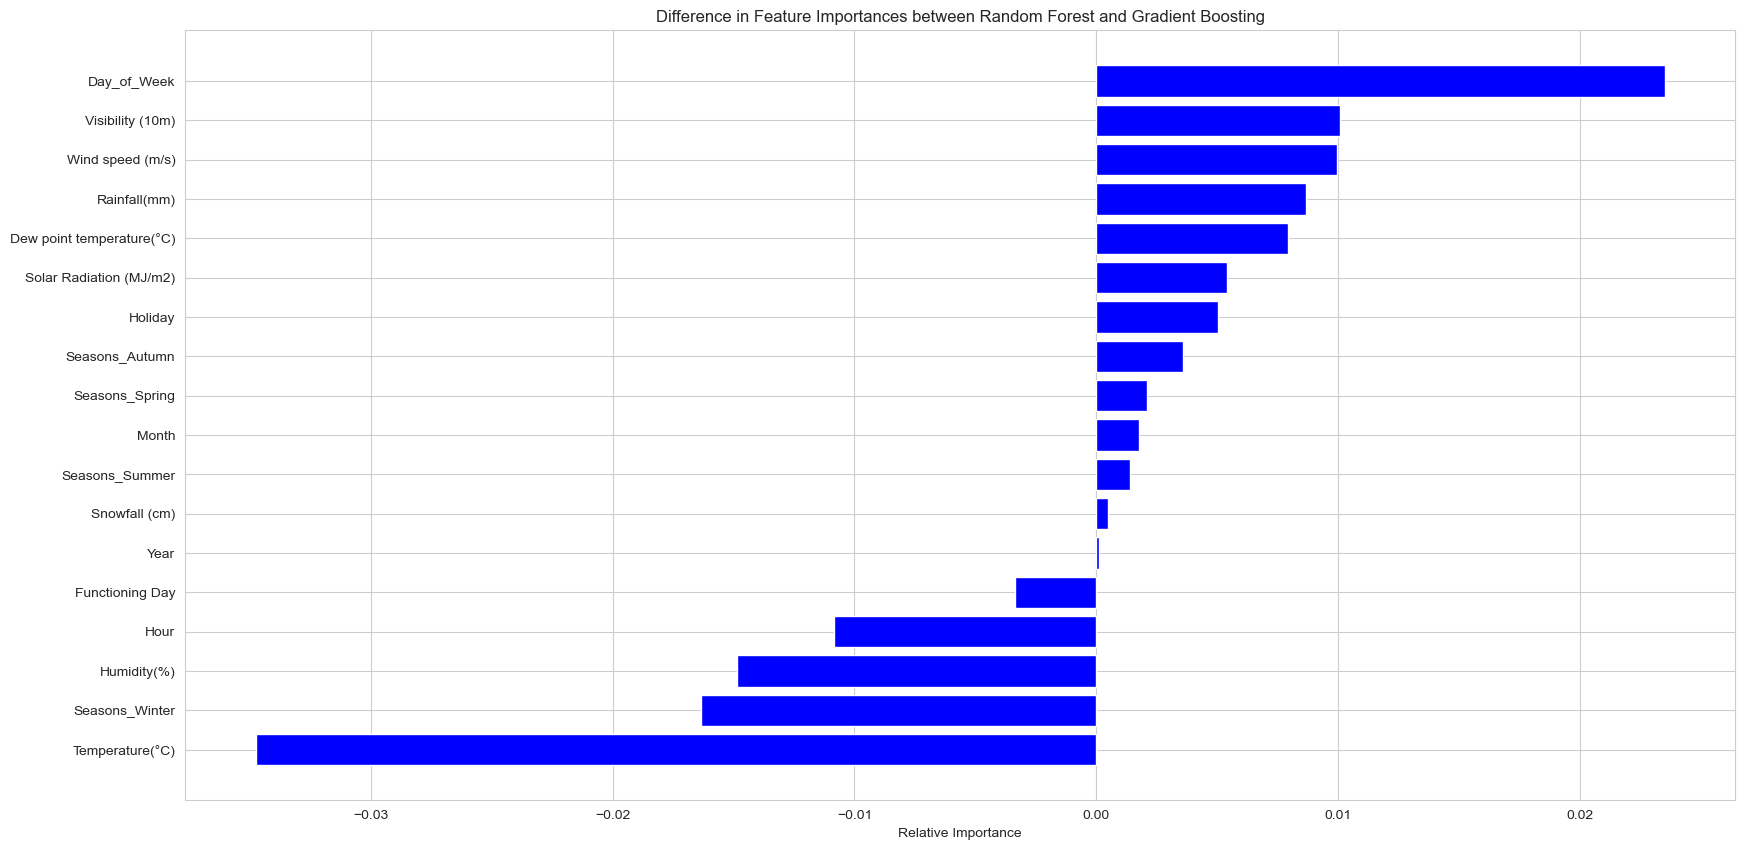

In [227]:
# difference between feature importances for random forest, gradient boosting and linear regression
# feature importances for random forest are calculated using the mean decrease in impurity method
# feature importances for gradient boosting are calculated using the mean decrease in impurity method

feature_importances = rf_model.feature_importances_ - gb_model.feature_importances_
feature_names = X.columns
indices = np.argsort(feature_importances)

plt.figure(figsize=(20, 10))
plt.title('Difference in Feature Importances between Random Forest and Gradient Boosting')
plt.barh(range(len(indices)), feature_importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()